# Введение в анализ данных
## Домашнее задание 3. 


**Правила:**

* Дедлайн **17 мая 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 3 балла

Сложная часть (необходимо на "отл"):

* Задача 2 -- 2 балла
* Задача 3 -- 10 баллов
* Задача 4 -- 4 балла

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

## Легкая часть

Перед выполнением этой части настоятельно рекомендуется посмотреть ноутбук с лекции про закон больших чисел.

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*.

**a).** Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


In [2]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib import animation as animation

sns.set(font_scale=1.6, palette='summer')

In [83]:
size = 300
samples_count = 500
samples = sps.expon().rvs(size=(samples_count, size))

X_j = samples.cumsum(axis=1)  # X_jn = X_j[n+1]
#  Для мат. ожидания и дисперсии берём теоретические значения: 1 и 1
Z_j = (X_j - np.arange(size) - 1) / (np.arange(size) + 1)**0.5

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

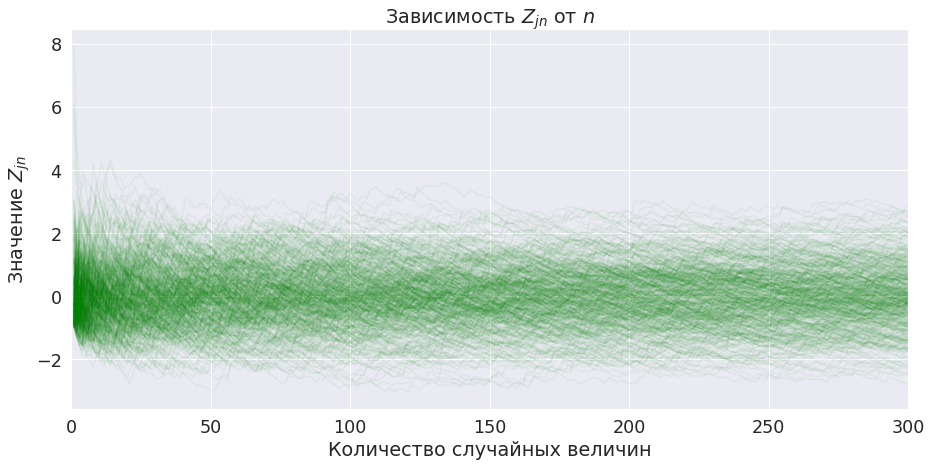

In [84]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, Z_j[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel(r'Значение $Z_{jn}$')
plt.xlim((0, size));
plt.title(r'Зависимость $Z_{jn}$ от $n$');

***Заметка:*** Значения $Z_{jn}$ не сходятся к чему либо по $n$ при $n\rightarrow+\infty$.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

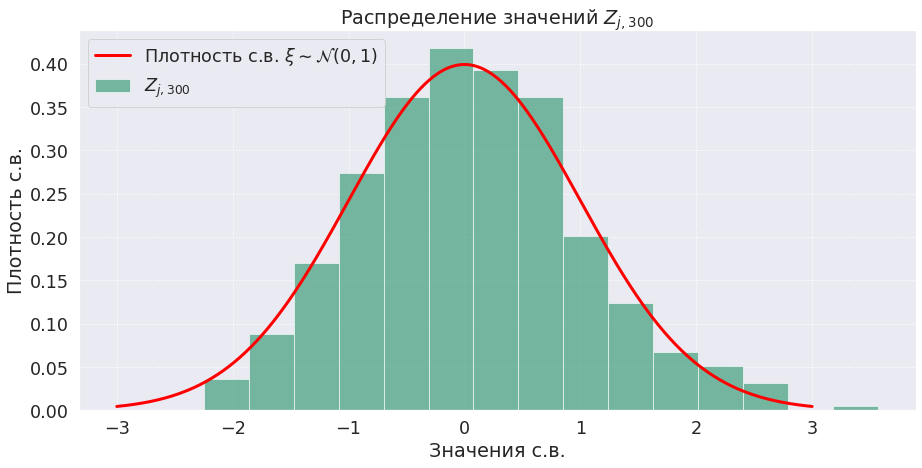

In [78]:
grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(15, 7))

plt.hist(
    Z_j.T[size - 1],
    bins=15,
    density=True,
    alpha=0.6,
    label=r'$Z_{j, 300}$'
)

# рисуем график плотности
plt.plot(
    grid,
    sps.norm.pdf(grid),
    color='r',
    linewidth=3,
    label=r'Плотность с.в. $\xi\sim\mathcal{N}(0, 1)$',
)
plt.xlabel('Значения с.в.')
plt.ylabel('Плотность с.в.')
plt.legend(loc="upper left")
plt.grid(ls=':')
plt.title(r'Распределение значений $Z_{j, 300}$')
plt.show()

***Заметка:*** гистограмма сильно похожа на плотность распределения $\mathcal{N}(0, 1)$.

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

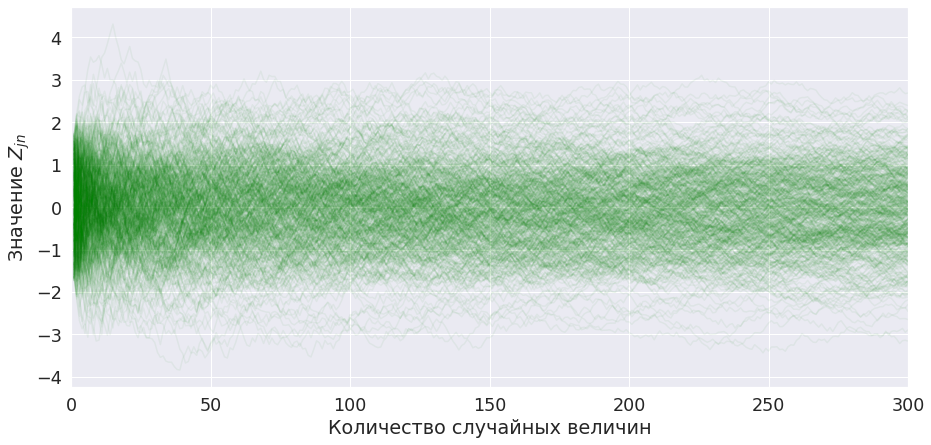

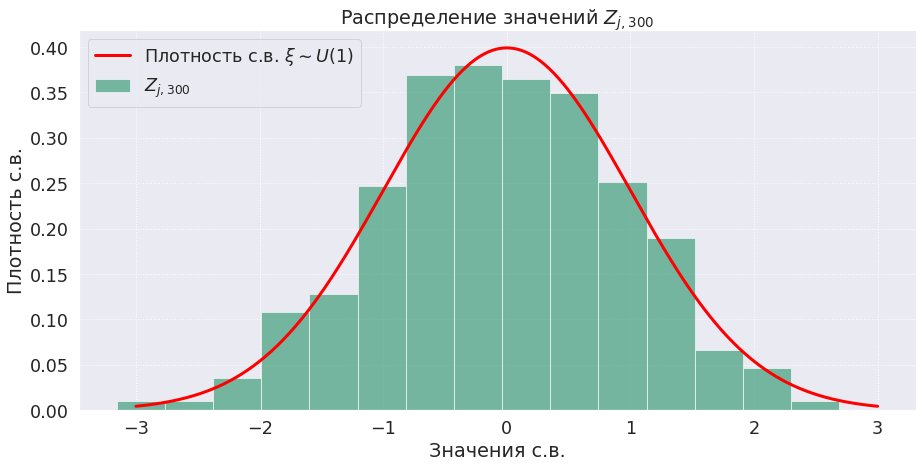

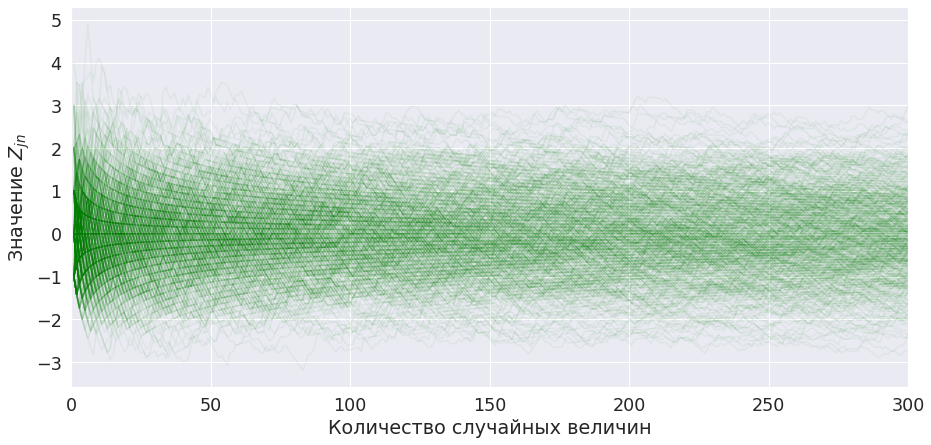

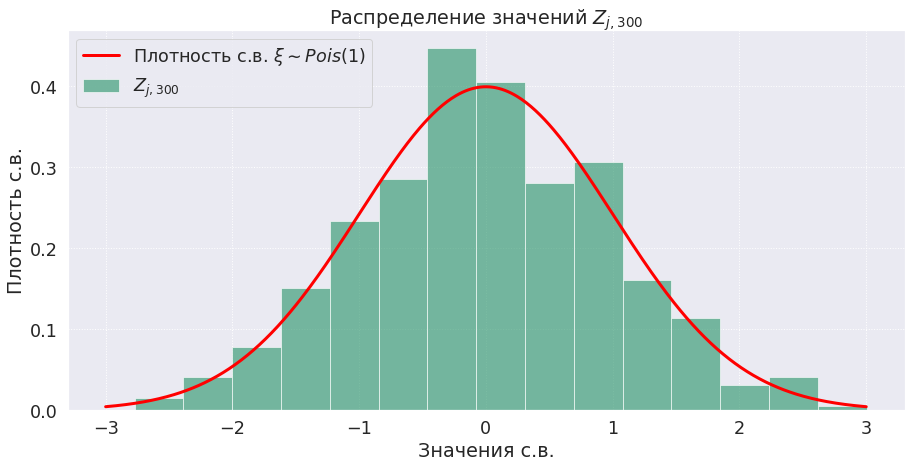

In [79]:
size = 300
samples_count = 500

for distr, label, expect, disper in zip(
    [sps.uniform(), sps.poisson(mu=1)],
    ['$U(1)$', '$Pois(1)$'],
    [0.5, 1],
    [1/12, 1]
):
    samples = distr.rvs(size=(samples_count, size))
    X_j = samples.cumsum(axis=1)
    Z_j = (X_j - (np.arange(size) + 1)*expect) / ((np.arange(size) + 1)*disper)**0.5
    
    
    plt.figure(figsize=(15, 7))
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, Z_j[i], color='green', alpha=0.05)
    plt.xlabel('Количество случайных величин')
    plt.ylabel(r'Значение $Z_{jn}$')
    plt.xlim((0, size))
    plt.title(r'Зависимость $Z_{jn}$ от $n$')


    grid = np.linspace(-3, 3, 500)
    plt.figure(figsize=(15, 7))

    plt.hist(
        Z_j.T[size - 1],
        bins=15,
        density=True,
        alpha=0.6,
        label=r'$Z_{j, 300}$'
    )
    plt.plot(
        grid,
        sps.norm.pdf(grid),
        color='r',
        linewidth=3,
        label=r'Плотность с.в. $\xi\sim$'+label,
    )
    plt.xlabel('Значения с.в.')
    plt.ylabel('Плотность с.в.')
    plt.legend(loc="upper left")
    plt.grid(ls=':')
    plt.title(r'Распределение значений $Z_{j, 300}$')
    plt.show()

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** при достаточность большом количестве случайных величин распределение значений отцентрированных и отнормированных сумм не сильно отклоняется от нормального распределения, причём чем больше случайных величин просуммировано, тем меньше отклонение. Данный эксперимент хорошо визуализирует смысл центральной предельной теоремы.

## Сложная часть

### Задача 2.

В этой задаче нужно визуализировать *закон повторого логарифма*.

Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из равномерного распределения на $\{-1, 1\}$. Согласно закону повторного логарифма траектория суммы $S_n = \xi_1 + ... + \xi_n$ при увеличении $n$ с вероятностью 1 бесконечное число раз пересекает границу $\pm (1-\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$, и лишь конечное число раз пересекает границу $\pm (1+\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов сумму в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Bern(1/2)$. По каждому из них посчитайте среднее $S_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму по первым $n$ величинам $j$-го набора.

In [3]:
size = 300
samples_count = 500

samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
samples[samples == 0] = -1
S_j = samples.cumsum(axis=1)

Для каждого $j$ нанесите на один график зависимость $S_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`.

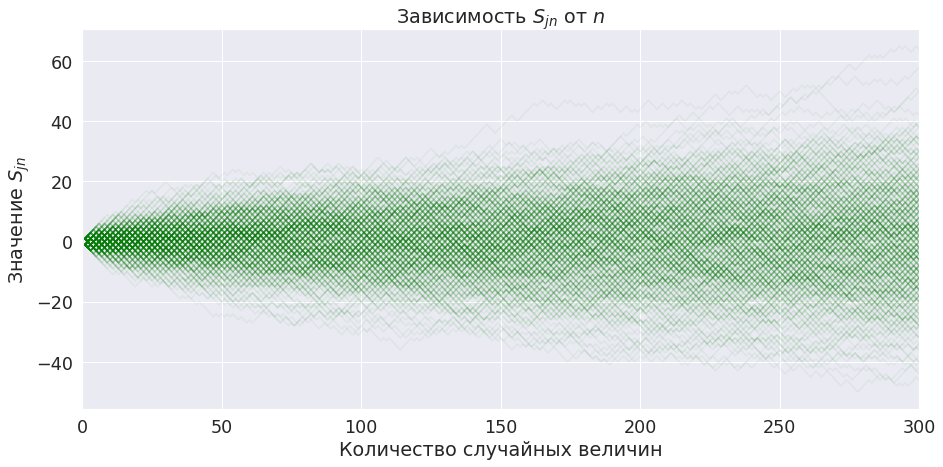

In [4]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, S_j[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel(r'Значение $S_{jn}$')
plt.xlim((0, size))
plt.title(r'Зависимость $S_{jn}$ от $n$');

Для трех различных $n$ по набору случайных величин $S_{1,n}, ..., S_{500,n}$ постройте график доли тех величин, которые выходят за порог $\pm с\sqrt{2n\log\log n}$ при изменении $c$ от 0.5 до 1.5. Графики стройте в строчку с помощью `plt.subplot`.

In [10]:
kek1 = np.array([[1, 2], [3, 4]])
kek2 = np.array([5, 2])
kek1 > kek2

ValueError: operands could not be broadcast together with shapes (2,2) (3,) 

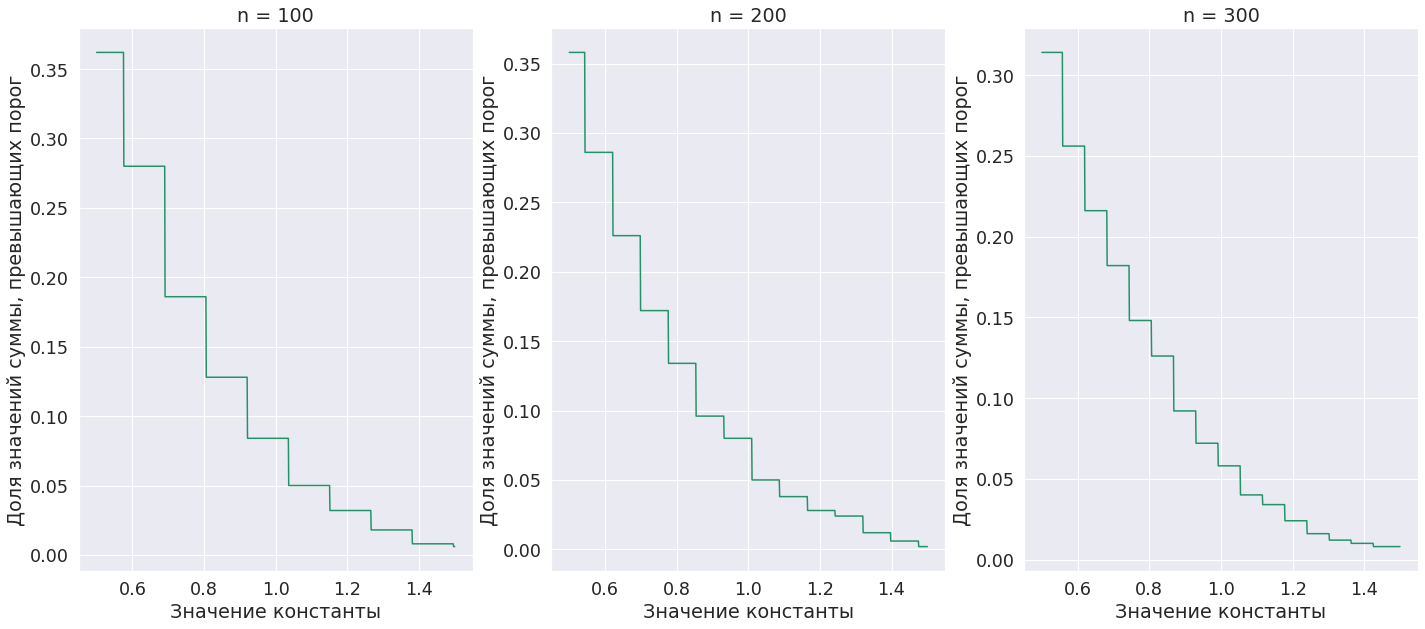

In [9]:
c = np.linspace(0.5, 1.5, 200)

plt.figure(figsize=(24, 10))
for n in [99, 199, 299]:
    loglog = c * (2*n*np.log(np.log(n)))**0.5

    port = [((abs(S_j.T[n]) > loglog[i])*1).sum() / samples_count for i in range(200)]
    plt.subplot(1, 3, n // 100 + 1)
    plt.plot(c, port)
    plt.xlabel('Значение константы')
    plt.ylabel('Доля значений суммы, превышающих порог')
    plt.title('n = ' + str(n+1))

# for i in range(4):    
#     plt.subplot(5, 2, i+1)
#     plt.plot(S_j.T[abs(S_j.T[n1]) > c[i]]/samples_count, lw=3)
#     plt.hlines(0.5, 0, size, alpha=0.3)
#     plt.xlabel('Количество случайных величин')
#     plt.ylabel('Значение суммы')
#     # plt.xlim((0, size))
    
# plt.tight_layout()



Сделайте вывод о смысле закона повторного логарифма. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** из графиков сразу видно, что, во-первых, при увеличении константы доля выходящих за порог сумм становится всё меньше, во-вторых, при увеличении $n$ "лестница" становится более прижатой к $0$ справа от единицы, а слева ниже $0.05$ не опускается. Данный эксперимент хорошо визуализирует смысл закона повторного логарифма.

---
### Задача 3.

В этой задаче нужно проявить и визуализировать свое *творчество*.

Общий принцип:
* Придумать какую-либо цель исследования, поставить вопрос или гипотезы
* Собрать необходимый набор данных "руками" или с помощью кода.
* Сделать простой анализ полученного датасета в этом ноутбуке.
* Сделать вывод.

Основные требования к данным:
* Все собранные данные необходимо представить в виде одной или нескольких таблиц формата `csv` или `xls`. Эти файлы должны легко считываться при помощи `pandas`. **Все эти файлы необходимо прислать вместе с решением на почту.**
* По строкам таблиц должны располагаться исследуемые объекты, например, люди. Одному объекту соответствует одна строка. По столбцам должны располагаться свойства объекта, например, пол, возраст.
* При сборе данных "руками" вы самостоятельно выбираете количество исследуемых объектов исходя из времени, которое необходимо на это потратить. Рассчитываемое время -- 2-3 часа.
* При сборе данных с помощью кода ограничивайте себя только размером доступных данных, которые можно скачать за 2-3 часа или 10000 объектами.
* Во всех случаях количество исследуемых объектов должно быть **не менее 30**. Количество свойств объектов -- **не менее двух**.

Основные требования к исследованию:
* Заранее необходимо четко определиться с вопросом, который вы хотите исследовать. Например, "хочу исследовать взаимосвязь двух свойств".
* При анализе необходимо провести полную визуализацию данных. Все графики должны быть оформлены грамотно.
* Подумайте, как вы можете применить полученные математические знания по курсу теории вероятностей для анализа собранных данных?
* Примените их если это возможно. Например, у вас не должно возникнуть проблем с тем, чтобы посчитать среднее, подкрепив корректность такого подхода соответствующей теоремой. А взаимосвязь двух свойств вы вряд ли сейчас сможете оценить по данным.
* Полноценные выводы.

Ниже перечислены некоторые идеи, но вы можете придумать свою. 
* Исследование характеристик и вкусовых качеств овощей/фруктов/ягод. В качестве свойств можно рассмотреть высоту объекта, радиус в разрезе, цвет, тип, вкусовую оценку, дату покупки, дату употребления.
* Исследование характеристик листьев деревьев. В качестве свойств можно рассмотреть длину и ширину листа, цвет, тип растения.
* Характеристики товаров в интернет-магазине, включая рейтинг.
* Музыкальные исполнители и песни. В качестве свойств можно рассмотреть рейтинг артиста, количество треков, количество ремиксов, количество коллабораций.
* Кинофильмы, мультфильмы, аниме.
* Анализ новостных лент. На сайте https://www.similarweb.com/ можно посмотреть статистику различных издательств, на основе чего придумать правило оценки степени "доверия" изданию. Исследуйте, какие новости первым публикует издание с наибольшим значением доверия? Опросите знакомых об отношении к этим новостям.
* Анализ данных пабликов ВК.
* Анализ схожести сайтов или блогов по частоте упоминания какой-либо темы.

---
### Задача 4.

Некоторые студенты второго курса ФИВТ понадеявшись на отмену учета посещения занятий по курсу "Введение в анализ данных" решили дудосить гугл-опросники. Команда "Физтех.Статистики" без особых проблем смогла разделить результаты опроса на спамовые и настоящие, а также установить круг подозреваемых. Теперь это предлагается сделать вам как начинающим аналитикам.

Вам выдаются результаты нескольких опросов. 
1. Необходимо для каждой строки понять, является ли результат спамовым или настоящим. Результаты анализа необходимо прислать на почту вместе с решением.
2. Какими общими характеристиками обладают спамовые записи? Как часто они происходят?